In [2]:
import numpy as np
import math
import scipy as sp
from scipy import optimize
from numpy import genfromtxt
import pandas as pd 
#import pymc3 as pm
#import arviz as az
import statistics as stats
import matplotlib.pyplot as plt

from matplotlib import cm
#from colorspacious import cspace_converter

Original Priors

In [12]:
# The file names here can be whatever you want. These are the appropriate file names as of 7_28_2022.

BHMoutput = genfromtxt("Summary from data generated by tiling smaller range.csv", delimiter=',', dtype=str)  # smaller range (without)  with 7_22 diff dists
MLEoutput = genfromtxt("MLEOutput on Generated Smaller Range.csv", delimiter=',', dtype=str) # Smaller Range (without)
numHeaderRows = 3
numParticipants = 116

BHMks = BHMoutput[numHeaderRows:(numHeaderRows+numParticipants),1].astype(float)
BHMbs = BHMoutput[(numHeaderRows+numParticipants):(numHeaderRows+numParticipants+numParticipants),1].astype(float)
MLEks = MLEoutput[2:,5].astype(float)
MLEbs = MLEoutput[2:,4].astype(float)
Realks = MLEoutput[2:,6].astype(float)
Realbs = MLEoutput[2:,7].astype(float)

Updated Priors

In [3]:
# In the comments are a bunch of other files that I've used here before. Feel free to try them to see other runs and how well they went.

# Bayesian is using: "Summary from data generated by tiling.csv" [k first, then b vertically, mean is first column]
# Bayesian before lognormal change is BHMoutput = genfromtxt("Summary from data generated by tiling smaller range.csv", delimiter=',', dtype=str)  # smaller range (without)
# MLE is using: "MLEOutput on Generated.csv" 

#BHMoutput = genfromtxt("Summary from data generated by tiling smaller range.csv", delimiter=',', dtype=str)  # smaller range (without)  with 7_22 diff dists
BHMoutput = genfromtxt("Summary from data generated by tiling smaller range with 7_25 diff dists with norm.csv", delimiter=',', dtype=str)  # smaller range (without)  with 7_22 diff dists
#Summary from data generated by tiling smaller range with 7_25 diff dists with norm.csv
#MLEoutput = genfromtxt("MLEOutput on Generated Smaller Range.csv", delimiter=',', dtype=str) # Smaller Range (without)
#Full Square\MLEOutput on Generated Smaller Range Full Square.csv
#MLEoutput = genfromtxt("Full Square\MLEOutput on Generated Smaller Range Full Square.csv", delimiter=',', dtype=str)
MLEoutput = genfromtxt("Full Square\MLEOutput on Generated Smaller Range Full Square Restored Test Again.csv", delimiter=',', dtype=str)

numHeaderRows = 5
numParticipants = 121

BHMks = BHMoutput[numHeaderRows:(numHeaderRows+numParticipants),1].astype(float)
BHMbs = BHMoutput[(numHeaderRows+numParticipants):(numHeaderRows+numParticipants+numParticipants),1].astype(float)

# Important when doing the logb runs
BHMbs = np.exp(-BHMbs)

MLEks = MLEoutput[2:,5].astype(float)
MLEbs = MLEoutput[2:,4].astype(float)
Realks = MLEoutput[2:,6].astype(float)
Realbs = MLEoutput[2:,7].astype(float)

Blend MLE Graphs (only for poster; not for analysis) - not in use

In [18]:
# I wrote this to blend the MLE graphs without averaging. This was for visual display for the poster, but we ended up not using it, so this is irrelevant now.

MLEoutput1 = genfromtxt("MLEOutput on Generated Smaller Range.csv", delimiter=',', dtype=str) # Smaller Range (without)
MLEoutput2 = genfromtxt("Full Square\MLEOutput on Generated Smaller Range Full Square Restored Test Again.csv", delimiter=',', dtype=str)
MLEks1 = MLEoutput1[2:,5].astype(float)
MLEbs1 = MLEoutput1[2:,4].astype(float)
Realks1 = MLEoutput1[2:,6].astype(float)
Realbs1 = MLEoutput1[2:,7].astype(float)
MLEks2 = MLEoutput2[2:,5].astype(float)
MLEbs2 = MLEoutput2[2:,4].astype(float)
Realks2 = MLEoutput2[2:,6].astype(float)
Realbs2 = MLEoutput2[2:,7].astype(float)
MLEkPercentError1 = 100*((MLEks1-Realks1))/Realks1
MLEbPercentError1 = 100*((MLEbs1-Realbs1))/Realbs1
MLEkPercentError2 = 100*((MLEks2-Realks2))/Realks2
MLEbPercentError2 = 100*((MLEbs2-Realbs2))/Realbs2

random_blend = np.append(np.random.binomial(1,0.5,size=np.size(MLEbs1)), np.array([1,1,1,1,1]))
MLEkPercentErrorBlend = MLEkPercentError2*random_blend + np.append(MLEkPercentError1, np.array([0,0,0,0,0]))*(random_blend==0)
MLEbPercentErrorBlend = MLEbPercentError2*random_blend + np.append(MLEbPercentError1, np.array([0,0,0,0,0]))*(random_blend==0)

In [ ]:
# THis is just to test. Try running these - it'll help clarify whether you're indexing the right values.

BHMoutput[numHeaderRows:(numHeaderRows+numParticipants),:2]
BHMoutput[(numHeaderRows+numParticipants):(numHeaderRows+numParticipants+numParticipants),:2]

Get Percent Errors

In [13]:
# This must be run in sequence with the above (not the test) and the below.

BHMkPercentError = 100*((BHMks-Realks))/Realks
BHMbPercentError = 100*((BHMbs-Realbs))/Realbs
MLEkPercentError = 100*((MLEks-Realks))/Realks
MLEbPercentError = 100*((MLEbs-Realbs))/Realbs

Parameter Recovery Failure in 2D Param Space

(11, 11)
(11, 11)
-47.687862896230016
26.621032731262993


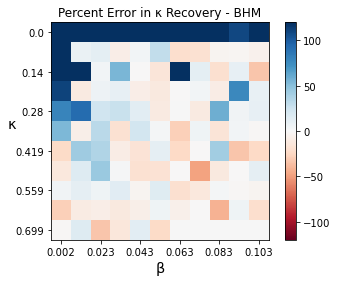

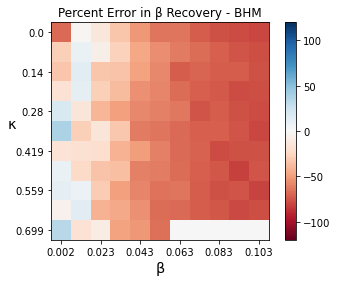

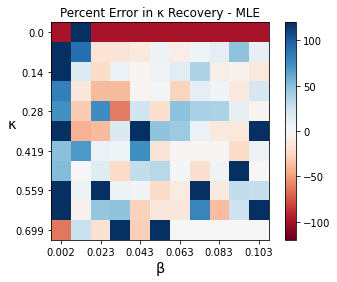

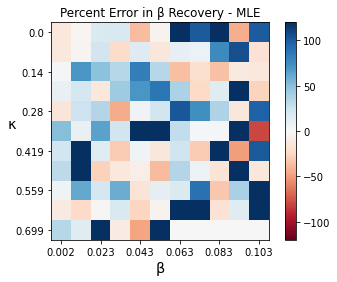

<Figure size 432x288 with 0 Axes>

In [15]:
# The percent errors get ridiculous at a certain point. This keeps them reasonable so they can all be graphed in the same color scale.
cap = 120

BHMkPercentError_square = np.append(BHMkPercentError, np.full((np.size(np.unique(Realks))**2)-np.size(BHMkPercentError),0)) # This line adds zeros to the percent error array to ensure a full 11x11 grid. This was used when simulating 116 sessions instead of 121.
BHMkPercentError_square_capped = BHMkPercentError_square  # Inelegant two line solution that could probably be done in one, but it works
BHMkPercentError_square_capped[BHMkPercentError_square > cap] = cap
BHMkGrid = np.reshape(BHMkPercentError_square_capped, (11,11))

BHMbPercentError_square = np.append(BHMbPercentError, np.full((np.size(np.unique(Realbs))**2)-np.size(BHMbPercentError),0))
BHMbPercentError_square_capped = BHMbPercentError_square
BHMbPercentError_square_capped[BHMbPercentError_square > cap] = cap
BHMbGrid = np.reshape(BHMbPercentError_square_capped, (11,11))

MLEkPercentError_square = np.append(MLEkPercentError, np.full((np.size(np.unique(Realks))**2)-np.size(MLEkPercentError),0))  
MLEkPercentError_square_capped = MLEkPercentError_square
MLEkPercentError_square_capped[MLEkPercentError_square > cap] = cap
MLEkGrid = np.reshape(MLEkPercentError_square_capped, (11,11))

MLEbPercentError_square = np.append(MLEbPercentError, np.full((np.size(np.unique(Realbs))**2)-np.size(MLEbPercentError),0))
MLEbPercentError_square_capped = MLEbPercentError_square
MLEbPercentError_square_capped[MLEbPercentError_square > cap] = cap
MLEbGrid = np.reshape(MLEbPercentError_square_capped, (11,11))

if False:
    # The below is a blend. Not for analysis. Only for visual purposes.
    MLEkPercentError_square = np.append(MLEkPercentErrorBlend, np.full((np.size(np.unique(Realks))**2)-np.size(MLEkPercentErrorBlend),0))
    MLEkPercentError_square_capped = MLEkPercentError_square
    MLEkPercentError_square_capped[MLEkPercentError_square > cap] = cap
    MLEkGrid = np.reshape(MLEkPercentError_square_capped, (11,11))

    MLEbPercentError_square = np.append(MLEbPercentErrorBlend, np.full((np.size(np.unique(Realbs))**2)-np.size(MLEbPercentErrorBlend),0))
    MLEbPercentError_square_capped = MLEbPercentError_square
    MLEbPercentError_square_capped[MLEbPercentError_square > cap] = cap
    MLEbGrid = np.reshape(MLEbPercentError_square_capped, (11,11))

    # This is also just for the blend:
    Realbs = Realbs2
    Realks = Realks2


print(np.shape(BHMbGrid))
print(np.shape(MLEbGrid))
print(np.average(BHMbGrid))
print(np.average(MLEbGrid))

# I am not good with matplotlib, so this is likely suboptimal. It works fine though. 

#plt.figure()
fig, ax = plt.subplots()
plt.imshow(BHMkGrid, cmap=plt.get_cmap('RdBu'), vmin=-cap, vmax=cap)    # vmax and vmin here set the bounds of the colorbar. This is critical to make sure it's centered at zero. 
plt.colorbar()                                                          # By the way, the colorbar choice here (RdBu) is important. Analysis online suggests that RdBu is very even in lightness as you progress toward the red end and the blue end. This means that -50 and 50 will appear similarly dark (just different colors). This is important so viewers can accurately assess visual information.
ax.set_xticks(range(11)[::2],np.round(np.unique(Realbs)[::],3)[::2])    # "[::2]" = every two values
ax.set_yticks(range(11)[::2],np.round(np.unique(Realks)[::],3)[::2])
ax.set_xlabel('β', fontsize='x-large')                                  # Definitely fiddle with font sizes. I'm in a huge rush so I can't do that now.
ax.set_ylabel('κ', rotation='horizontal', fontsize='x-large')
#ax.legend()
plt.title("Percent Error in κ Recovery - BHM")

fig2, ax2 = plt.subplots()
plt.imshow(BHMbGrid, cmap=plt.get_cmap('RdBu'), vmin=-cap, vmax=cap)
plt.colorbar()
ax2.set_xticks(range(11)[::2],np.round(np.unique(Realbs)[::],3)[::2])
ax2.set_yticks(range(11)[::2],np.round(np.unique(Realks)[::],3)[::2])
ax2.set_xlabel('β', fontsize='x-large')
ax2.set_ylabel('κ', rotation='horizontal', fontsize='x-large')
plt.title("Percent Error in β Recovery - BHM")

if True:
    #plt.figure()

    fig3, ax3 = plt.subplots()
    plt.imshow(MLEkGrid, cmap=plt.get_cmap('RdBu'), vmin=-cap, vmax=cap)
    plt.colorbar()
    ax3.set_xticks(range(11)[::2],np.round(np.unique(Realbs)[::],3)[::2])
    ax3.set_yticks(range(11)[::2],np.round(np.unique(Realks)[::],3)[::2])
    ax3.set_xlabel('β', fontsize='x-large')
    ax3.set_ylabel('κ', rotation='horizontal', fontsize='x-large')
    plt.title("Percent Error in κ Recovery - MLE")

    fig4, ax4 = plt.subplots()
    plt.imshow(MLEbGrid, cmap=plt.get_cmap('RdBu'), vmin=-cap, vmax=cap)
    plt.colorbar()
    ax4.set_xticks(range(11)[::2],np.round(np.unique(Realbs)[::],3)[::2])
    ax4.set_yticks(range(11)[::2],np.round(np.unique(Realks)[::],3)[::2])
    ax4.set_xlabel('β', fontsize='x-large')
    ax4.set_ylabel('κ', rotation='horizontal', fontsize='x-large')
    plt.title("Percent Error in β Recovery - MLE")

plt.show()
plt.savefig("small range figs before lognormal.jpg")

Straight Scatter Plots of Param Recovery

In [31]:
np.max(Realbs)

0.10313472909090908

Text(0.5, 1.0, 'B Recovery of MLE Model')

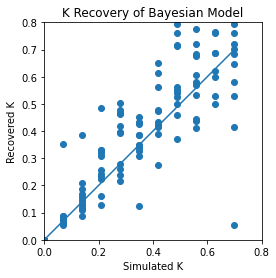

<Figure size 432x288 with 0 Axes>

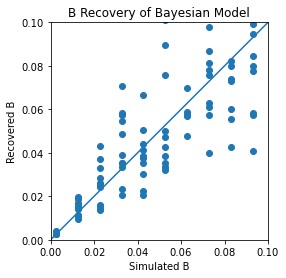

<Figure size 432x288 with 0 Axes>

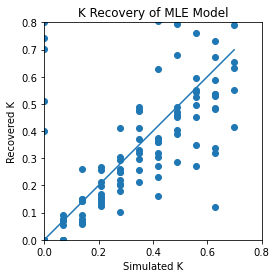

<Figure size 432x288 with 0 Axes>

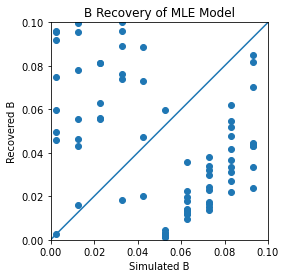

In [51]:
# These are ok but they have two problems. 1) They aren't as informative as the above plots in my opinion (though more clear certainly), and 2) they can't really be done with square axes (unless you cap by percent error I suppose). The recovered are sometimes ridiculously different from the simulated, so some graphs might be 80-800 times taller than they are wide to fit the data. Here, I have the graphs just cropping at square axes. This is still informative, but doesn't show the full range. 

fig, axlines = plt.subplots()
plt.scatter(Realks,BHMks) #, c=BHMkPercentError
plt.plot([0,np.max(Realks)],[0,np.max(Realks)])
plt.xlabel("Simulated K")
plt.ylabel("Recovered K")
#plt.axis('equal')
axlines.set(xlim=(0, 0.8), ylim=(0, 0.8))
axlines.set_aspect('equal','box')
plt.title("K Recovery of Bayesian Model")

plt.figure()
fig, axlines = plt.subplots()
plt.scatter(Realbs,BHMbs) #, c=BHMkPercentError
plt.plot([0,np.max(Realbs)],[0,np.max(Realbs)])
plt.xlabel("Simulated B")
plt.ylabel("Recovered B")
axlines.set(xlim=(0, 0.1), ylim=(0, 0.1))
axlines.set_aspect('equal','box')
plt.title("B Recovery of Bayesian Model")

plt.figure()
fig, axlines = plt.subplots()
plt.scatter(Realks,MLEks) #, c=BHMkPercentError
plt.plot([0,np.max(Realks)],[0,np.max(Realks)])
plt.xlabel("Simulated K")
plt.ylabel("Recovered K")
axlines.set(xlim=(0, 0.8), ylim=(0, 0.8))
axlines.set_aspect('equal','box')
plt.title("K Recovery of MLE Model")

plt.figure()
fig, axlines = plt.subplots()
plt.scatter(Realbs,MLEbs) #, c=BHMkPercentError
plt.plot([0,np.max(Realbs)],[0,np.max(Realbs)])
plt.xlabel("Simulated B")
plt.ylabel("Recovered B")
axlines.set(xlim=(0, 0.1), ylim=(0, 0.1))
axlines.set_aspect('equal','box')
plt.title("B Recovery of MLE Model")

Hoarding Code

In [ ]:
# None of this is necessary. I'm keeping it in case someone runs into some weird problem and the solution happens to be in here. Feel free to delete.

# _x = np.arange(4)
#_y = np.arange(5)
#_xx, _yy = np.meshgrid(_x, _y)
#x, y = _xx.ravel(), _yy.ravel()

#bottom = np.zeros_like(top)
#width = depth = 1

#ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
#ax1.set_title('Shaded')

#ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
#ax2.set_title('Not Shaded')


if False:
    for mat in BHMkPercentError, BHMbPercentError:
        mat_square = np.append(mat, np.zeros((np.size(np.unique(Realks))**2)-np.size(mat)))
        mat_square_capped = mat_square
        mat_square_capped[mat_square > 200] = 200
        matGrid = np.reshape(mat_square_capped, (11,11))
    #_Realk, _Realb = np.meshgrid(np.unique(Realks), np.unique(Realbs))
    #Graphx_aka_Realk = _Realk.ravel()  #no idea what this means
    #Graphy_aka_Realb = _Realb.ravel()
    #Graphbottom = np.zeros((np.size(np.unique(Realks)),np.size(np.unique(Realbs))))
    bottom = np.zeros_like(Realks)
    width = depth = 1

    BHMFig = plt.figure(figsize=(8, 3))
    BHMkSubfig = BHMFig.add_subplot(121, projection='3d')
    BHMbSubFig = BHMFig.add_subplot(122, projection='3d')
    #BHMkheight = np.reshape(np.append(BHMkPercentError, np.zeros((np.size(np.unique(Realks))**2)-np.size(BHMkPercentError))),(np.size(np.unique(Realks)),np.size(np.unique(Realbs)))) #adding enough 0s to the end of BHMkPercentError to allow it to be reshaped to a square array. Some graph spots will be zero (necessary bc of original size 116). Then reshaping. This turns out to be reshaping to 11,11
    BHMkheight = np.append(BHMkPercentError, np.zeros((np.size(np.unique(Realks))**2)-np.size(BHMkPercentError)))

    #print(np.shape(Graphbottom), np.shape(BHMkheight), np.shape(Graphy_aka_Realb))

    #BHMkSubfig.bar3d(Graphx_aka_Realk, Graphy_aka_Realb, Graphbottom, width, depth, BHMkheight, shade=True)
    BHMkPercentError_square = np.append(BHMkPercentError, np.zeros((np.size(np.unique(Realks))**2)-np.size(BHMkPercentError)))

    _x = np.arange(np.size(np.unique(Realks)))
    _y = np.arange(np.size(np.unique(Realbs)))
    _xx, _yy = np.meshgrid(_x, _y)
    x, y = _xx.ravel(), _yy.ravel()

    BHMkPercentError_square_capped = BHMkPercentError_square
    BHMkPercentError_square_capped[BHMkPercentError_square > 200] = 200

    BHMkSubfig.bar3d(x, y, np.zeros_like(BHMkPercentError_square), width, depth, BHMkPercentError_square_capped)
    _x = np.arange(4)
    _y = np.arange(5)
    _xx, _yy = np.meshgrid(_x, _y)
    x, y = _xx.ravel(), _yy.ravel()

    top = x + y
    bottom = np.zeros_like(top)

    print(np.shape(_xx),np.shape(_yy),np.shape(x), np.shape(top))
    print(x)
    print(y)